# Google Colab 한글 폰트 설치

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

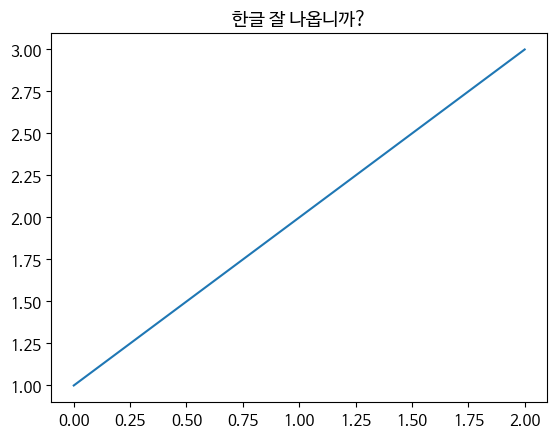

In [3]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 데이터 불러오기

In [7]:
import pandas as pd

boston = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/boston.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
def fillna_all_means(df):
    df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'object' else col)
    return df
boston2 = fillna_all_means(boston)
boston2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 상관계수 확인

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


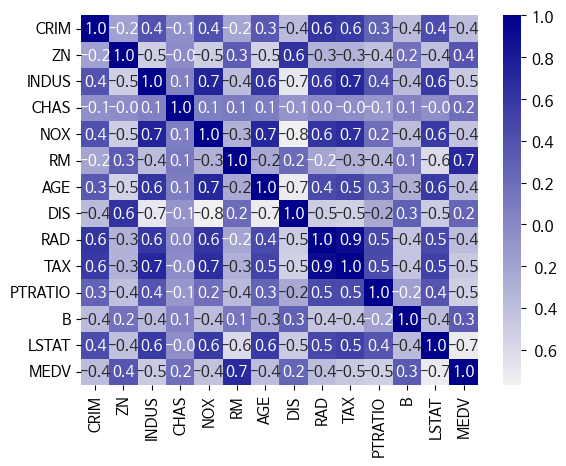

In [15]:
import seaborn as sns
cmap = sns.light_palette("darkblue", as_cmap=True)
sns.heatmap(boston2.corr(), annot=True, fmt='3.1f', cmap=cmap)

## 변수 줄이기 가독성 위해

In [16]:
boston3 = boston2.loc[:, ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'MEDV']]
boston3.head()

,CRIM,ZN,INDUS,NOX,RM,MEDV
0,0.00632,18.0,2.31,0.538,6.575,24.0
1,0.02731,0.0,7.07,0.469,6.421,21.6
2,0.02729,0.0,7.07,0.469,7.185,34.7
3,0.03237,0.0,2.18,0.458,6.998,33.4
4,0.06905,0.0,2.18,0.458,7.147,36.2


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


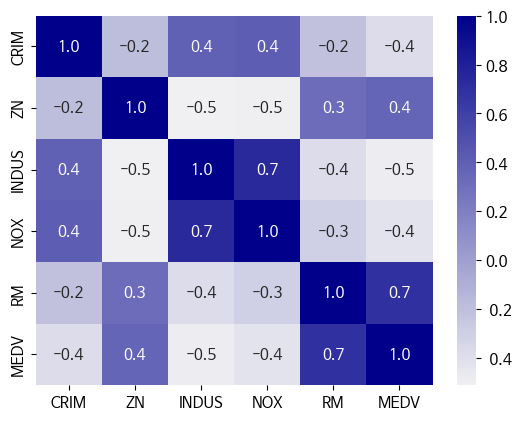

In [17]:
import seaborn as sns
cmap = sns.light_palette("darkblue", as_cmap=True)
sns.heatmap(boston3.corr(), annot=True, fmt='3.1f', cmap=cmap)

## 모델 만들기

In [ ]:
# formula = "MEDV ~ CRIM + ZN"

In [21]:
import statsmodels.formula.api as smf

# formula = "MEDV ~ " + "+".join(boston3.columns)
formula = 'MEDV ~ CRIM + ZN + INDUS + RM'
model = smf.ols(formula, data = boston3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     164.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.56e-90
Time:                        00:44:52   Log-Likelihood:                -1627.7
No. Observations:                 506   AIC:                             3265.
Df Residuals:                     501   BIC:                             3286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.1484      2.849     -7.775      0.0

## 다중공선성
- 개념
  + 서로 상관계수가 높은 여러 독립변수들이 존재함
  + 이 변수 중에서 어떤 변수가 종속변수에 영향을 끼치는지 정확하게 알기 어려울 때 문제가 발생

- 매출액 예측
  + 광고비
  + 노출빈도수
  + 클릭수
  + 현재 장바구니에 물건을 가지고 있는 사람 수
  + 구매 페이지에서 활동하고 사람 수

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = boston2.iloc[:, :-1]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values("VIF").reset_index(drop=True)

,feature,VIF
0,CHAS,1.149619
1,CRIM,2.021270
2,ZN,2.690726
3,LSTAT,10.516244
4,INDUS,13.582348
5,DIS,13.833517
6,RAD,15.094122
7,AGE,19.805308
8,B,20.144260
9,TAX,60.597824


## 일부 수치 데이터에 정규화

In [23]:
import statsmodels.formula.api as smf
import numpy as np

formula = "MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(RM) + scale(NOX)"
model = smf.ols(formula, data = boston2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.10e-89
Time:                        00:59:25   Log-Likelihood:                -1626.3
No. Observations:                 506   AIC:                             3265.
Df Residuals:                     500   BIC:                             3290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.5328      0.269     83.687   

## 캐글 데이터 분석
- 회귀분석 : 종속변수 loan_amount
- 로지스틱회귀분석 : 종속변수 loan_status
- 시각화
  + loan_amount or loan_status가 y축 설정